# 1. Import images

In [1]:
import scipy.io
data = scipy.io.loadmat('data/ex3data1.mat')

# A 5000x400matrix, each row representing a 20x20 pixel image
X = data['X']

# A 5000-dimensional matrix, each element representing the number shown in the corresponding image
Y = data['y'].reshape(5000)

# Setup the parameters
input_layer_size  = 400  # 20x20 input images of digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10

# 2. Display selection of images

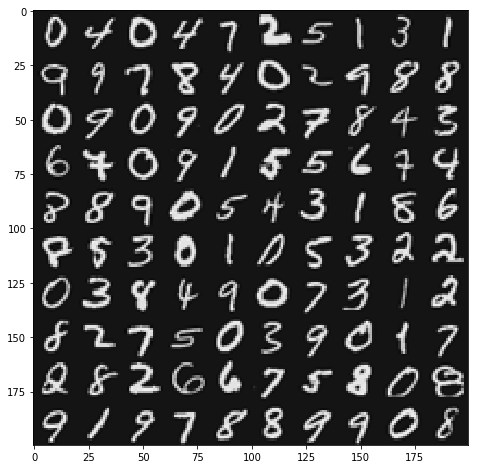

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Generating new random numbers each time I executed the kernel meant that
# a new image had to be generated, so I wrote a script to generate a
# hundred random numbers between 0 and 4999 and copied the output here
rand_nums = np.array([457, 4925, 31, 3479, 4392, 4110, 107, 4292, 1345, 4614,
              2150, 4885, 4793, 3883, 4483, 2977, 1859, 1417, 4038, 957,
              430, 3598, 300, 431, 4691, 1799, 4190, 3643, 1084, 4735,
              2327, 4340, 4743, 4754, 277, 244, 2213, 2740, 3237, 3709,
              3976, 2278, 87, 539, 2720, 683, 4561, 481, 3181, 4488, 1201,
              47, 1028, 2608, 2036, 92, 332, 1804, 3586, 4337, 2778, 1057,
              3827, 2949, 1906, 2751, 3865, 4615, 2612, 4600, 503, 4705,
              4014, 3409, 618, 1735, 1587, 1, 4115, 4910, 1780, 4219, 2058,
              3611, 4372, 1424, 996, 821, 289, 492, 954, 4034, 1789, 2137,
              3246, 1474, 1038, 3524, 4456, 4093])

img_arr = np.empty([20, 220])
for j in range(0, 10):
    # Array to hold a row of 10 images
    img_row = np.empty([20, 20])
    for i in range(0, 10):
        img = X[rand_nums[(10*j) + i]].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    # Add row to the image matrix
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(12,8))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show random selection of 100 images using imshow
plt.show()

# 3. Cost function

## 3.1 Actual Definition

In [3]:
from scipy.special import expit
import math

def h(theta, vec):
    return expit(np.dot(vec, theta))

def cost_function(params, X, Y, input_layer_size, hidden_layer_size, num_labels):
    # Reshape params
    theta1 = params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(
        (hidden_layer_size, input_layer_size + 1))
    theta2 = params[(hidden_layer_size * (input_layer_size + 1)):].reshape(
        (num_labels, (hidden_layer_size + 1)))

    m = Y.shape[0]
    cost = 0
    # For every training example:
    for i in range(0, m):

        # Hidden layer
        z2 = np.dot(theta1, X[i].T)
        a2 = expit(z2)
        # Add bias nodes
        a2 = np.concatenate((np.ones(1), a2), axis=0)

        # Final layer
        z3 = np.dot(theta2, a2.T)
        a3 = expit(z3)
        hypothesis = a3

        # construct y
        y = np.zeros(10)
        # Suppose Y[i] = 5, y needs to be a 10-dimensional matrix with y[4] = 1 (becoz indexing starts with zero)
        y[Y[i] - 1] = 1

        # For every class:
        for k in range(0, num_labels):
            first_term = -y[k] * math.log(hypothesis[k])
            second_term = -(1 - y[k]) * math.log(1 - hypothesis[k])
            cost = cost + (first_term + second_term)

    return cost/m

## 3.2 Testing the cost function against given theta

In [4]:
data_nn = scipy.io.loadmat('data/ex3weights.mat')
theta1 = data_nn['Theta1']
theta2 = data_nn['Theta2']

X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Unroll theta1, theta2
params = np.concatenate((theta1.reshape(hidden_layer_size * (input_layer_size+1)),
                  theta2.reshape(num_labels * (hidden_layer_size + 1))))

print "Testing cost function with given weights:",cost_function(params, X, Y, input_layer_size, hidden_layer_size, num_labels)

Testing cost function with given weights: 0.287629165161


## 3.3 Regularized cost function

In [5]:
def regularized_cost_function(params, X, Y, lambda_, input_layer_size, hidden_layer_size, num_labels):
    # Reshape params
    theta1 = params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(
        (hidden_layer_size, input_layer_size + 1))
    theta2 = params[(hidden_layer_size * (input_layer_size + 1)):].reshape(
        (num_labels, (hidden_layer_size + 1)))

    m = Y.shape[0]
    cost = cost_function(params, X, Y, input_layer_size, hidden_layer_size, num_labels)
    regularization_term = 0
    for j in range(0, theta1.shape[0]):
        for k in range(1, theta1.shape[1]):
            regularization_term = regularization_term + (theta1[j, k]*theta1[j, k])

    for j in range(0, theta2.shape[0]):
        for k in range(1, theta2.shape[1]):
            regularization_term = regularization_term + (theta2[j, k]*theta2[j, k])

    regularization_term = (regularization_term*lambda_) / (2*m)
    return cost + regularization_term

print "Regularized Cost:", regularized_cost_function(params, X, Y, 1, input_layer_size, hidden_layer_size, num_labels)

Regularized Cost: 0.383769859091


# 4. Sigmoid Gradient Function

In [6]:
def sigmoid_gradient(z):
    return z * (1-z)

# 5. Initialize weights at random

In [7]:
import random

# returns a matrix of size L_out, (L_in + 1)
def rand_init_weights(L_in, L_out):
    epsilon_init = 0.12
    W = np.zeros((L_out, (L_in + 1)))

    for i in range(0, L_out):
        for j in range(0, L_in + 1):
            W[i, j] = random.uniform(-epsilon_init, epsilon_init)

    return W

# 6. Backpropogation algorithm

In [8]:
def backpropogation(params, X, Y, lambda_, input_layer_size, hidden_layer_size, num_labels):
    # Reshape params
    theta1 = params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(
        (hidden_layer_size, input_layer_size + 1))
    theta2 = params[(hidden_layer_size * (input_layer_size + 1)):].reshape(
        (num_labels, (hidden_layer_size + 1)))

    m = Y.shape[0]
    tr_delta2 = np.zeros(theta2.shape)
    tr_delta1 = np.zeros(theta1.shape)
    for t in range(0, m):
        # First layer
        a1 = X[t].T

        # Hidden layer
        z2 = np.dot(theta1, a1)
        a2 = expit(z2)
        # Add bias nodes
        a2 = np.concatenate((np.ones(1), a2), axis=0)

        # Final layer
        z3 = np.dot(theta2, a2.T)
        a3 = expit(z3)

        # construct y
        y = np.zeros(theta2.shape[0])
        y[Y[t] - 1] = 1

        delta3 = a3 - y
        delta2 = np.multiply(np.dot(theta2.T, delta3), sigmoid_gradient(a2))
        # Need to skip delta2[0]
        delta2 = delta2[1:]

        tr_delta2 += np.array([delta3]).T.dot(np.array([a2]))
        tr_delta1 += np.array([delta2]).T.dot(np.array([a1]))
    D1 = tr_delta1 / m
    D2 = tr_delta2 / m

    D1[:, 1:] += (lambda_/m) * theta1[:, 1:]
    D2[:, 1:] += (lambda_/m) * theta2[:, 1:]
    return np.concatenate((D1.reshape(D1.size), D2.reshape(D2.size)))


# 7. Initialize Parameters

In [9]:
initial_theta1 = rand_init_weights(input_layer_size, hidden_layer_size)
initial_theta2 = rand_init_weights(hidden_layer_size, num_labels)

# Unroll parameters
intitial_nn_params = np.concatenate((initial_theta1.reshape(initial_theta1.size),
                               initial_theta2.reshape(initial_theta2.size)))

# 8. Computing the numerical gradient

In [10]:
def compute_numerical_gradient(J, theta, X, Y, input_layer_size, hidden_layer_size, num_labels):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    for p in range(0, theta.shape[0]):
        perturb[p] = e
        loss1 = J(theta - perturb, X, Y, input_layer_size, hidden_layer_size, num_labels)
        loss2 = J(theta + perturb, X, Y, input_layer_size, hidden_layer_size, num_labels)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)
        perturb[p] = 0

    return numgrad

# 9. Check gradients

In [11]:
from numpy import linalg as LA

def debug_init_weights(fan_out, fan_in):
    w = np.zeros((fan_out, 1 + fan_in))
    w = np.sin(np.arange(1, w.size+1)).reshape(w.shape) / 10
    return w

# Creates a small neural network to check the backpropogation gradients
def check_gradients(lambda_):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    # Generate some 'random' test data
    theta1 = debug_init_weights(hidden_layer_size, input_layer_size)
    theta2 = debug_init_weights(num_labels, hidden_layer_size)

    # Reusing debug_init_weights to generate X
    X  = debug_init_weights(m, input_layer_size - 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(5, 1), X), axis=1)
    Y  = 1 + (np.arange(1,m+1) % num_labels).conj().T

    #Unroll parameters
    nn_params = np.concatenate((theta1.reshape(theta1.size), theta2.reshape(theta2.size)))

    numgrad = compute_numerical_gradient(cost_function, nn_params, X, Y, input_layer_size, hidden_layer_size, num_labels)

    grad = backpropogation(nn_params, X, Y, lambda_, input_layer_size, hidden_layer_size, num_labels)

    # Calculate norm diff
    diff = LA.norm(numgrad - grad)/LA.norm(numgrad + grad)
    print "Relative difference between grad. calculated numerically and using backprop impl:", diff
    print "Note: the relative difference should be small (less than 1e-9)"

check_gradients(3)

Relative difference between grad. calculated numerically and using backprop impl: 2.0772398763e-11
Note: the relative difference should be small (less than 1e-9)


# 10. Obtain Θ (big theta)

In [12]:
import scipy.optimize as opt

def get_theta():
    big_theta = opt.fmin_cg(regularized_cost_function,
                                   x0= intitial_nn_params,
                                   fprime=backpropogation,
                                   maxiter=50,
                                   disp=False,
                                   args=(X, Y, 1, input_layer_size, hidden_layer_size, num_labels))
    return big_theta

big_theta = get_theta()

In [13]:
# Obtain Theta1 and Theta2
big_theta.shape
theta1 = big_theta[0:(hidden_layer_size * (input_layer_size + 1))].reshape(
    (hidden_layer_size, input_layer_size + 1))

theta2 = big_theta[(hidden_layer_size * (input_layer_size + 1)):].reshape(
    (num_labels, (hidden_layer_size + 1)))

# 11. Prediction

In [14]:
def prediction(hypothesis, i, Y):
    prediction = np.argmax(hypothesis) + 1
    if (prediction == Y[i]):
        return True
    else:
        return False

def feed_forward_propogation(X, Y):
    correct_hypotheses = 0
    for i in range(0, X.shape[0]):
        # First layer
        z2 = np.dot(theta1, X[i].T)
        a2 = expit(z2)
        # Add bias nodes
        a2 = np.concatenate((np.ones(1), a2), axis=0)

        # Second layer
        z3 = np.dot(theta2, a2.T)
        a3 = expit(z3)

        # Final layer (hypothesis)
        hypothesis = a3
        result = prediction(hypothesis, i, Y)
        if (result):
            correct_hypotheses = correct_hypotheses + 1

    print 'Accuracy of Neural Network: %0.2f%%' % (float(correct_hypotheses) * 100.0 / 5000.0)

feed_forward_propogation(X, Y)

Accuracy of Neural Network: 96.48%


# 12. Visualizing the hidden layer

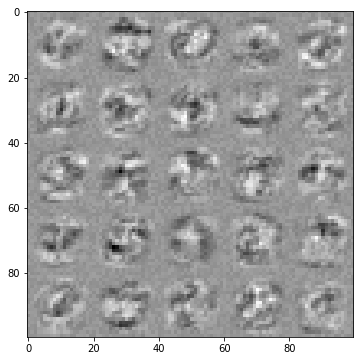

In [15]:
# Need to remove bias nodes first
visualize_theta = theta1[:, 1:]

img_arr = np.empty([20, 120])
for j in range(0, 5):
    # Array to hold a row of 5 images
    img_row = np.empty([20, 20])

    for i in range(0, 5):
        img = visualize_theta[i*5 + j].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    # Add row of 5 images to the image matrix (5x5)
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(10,6))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show Hidden layer visualization
plt.show()